 Use K-Means clustering to segment customers in the Wholesale Customers dataset based on their annual spending in different categories. Visualize the clusters.



   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


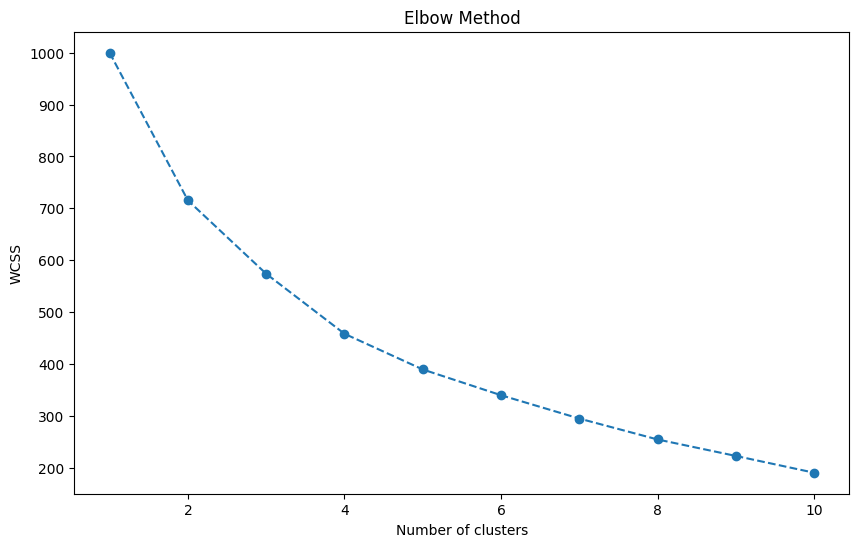

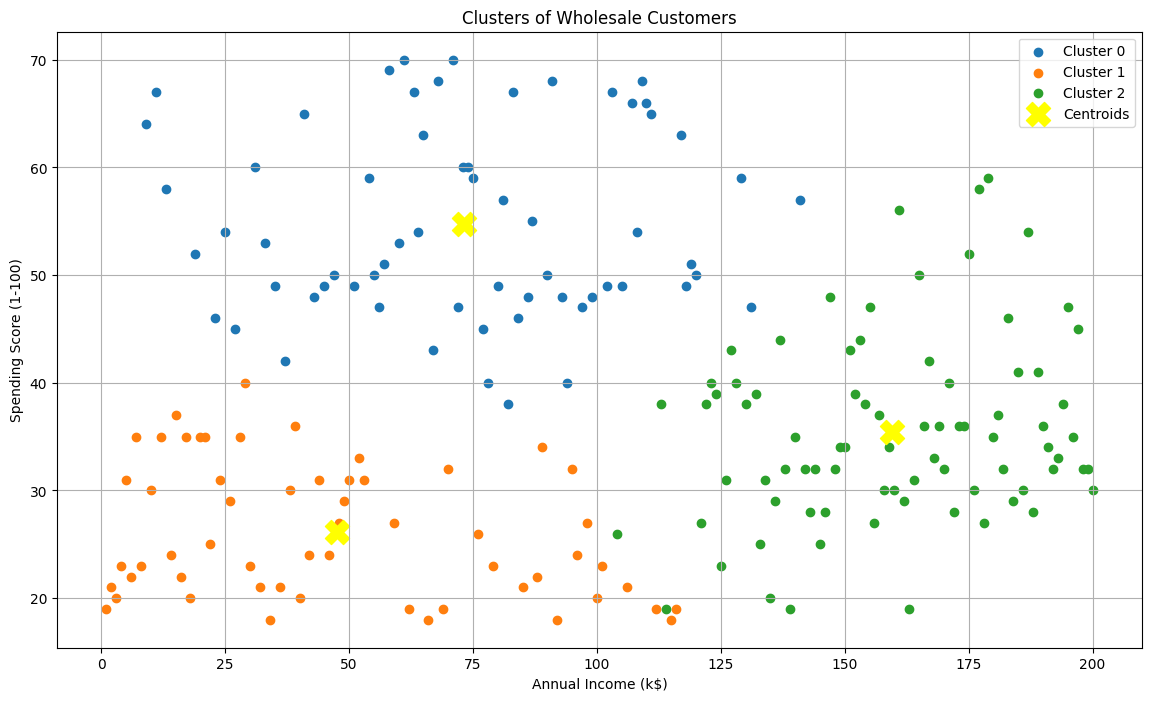

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
 
data = pd.read_csv("Mall_Customers.csv")

print(data.head())
print(data.info())

if 'Genre' in data.columns:
    data = pd.get_dummies(data, columns=['Genre'], drop_first=True)

scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaledData)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimalClusters = 3
kmeans = KMeans(n_clusters=optimalClusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaledData)

data['Cluster'] = clusters

plt.figure(figsize=(14, 8))

for i in range(optimalClusters):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {i}')

centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='X')

plt.title('Clusters of Wholesale Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()


 Determine the optimal number of clusters for the Wholesale Customers dataset using the Elbow Method and Silhouette Score. Visualize the results and justify your choice.



Missing values in each column:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-p

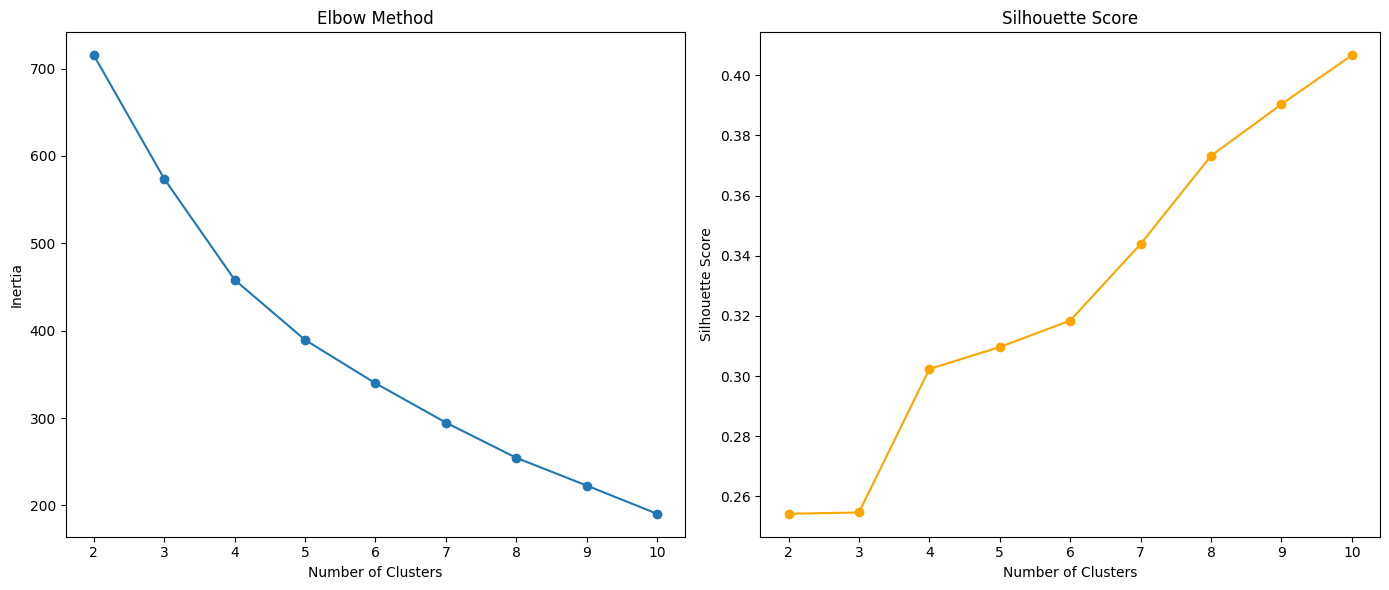

The optimal number of clusters based on the silhouette score is: 10


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("Mall_Customers.csv")

print("Missing values in each column:\n", data.isnull().sum())

data = pd.get_dummies(data, columns=['Genre'], drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

inertia = []
silhouetteScore = []
clusterRange = range(2, 11) 

for k in clusterRange:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouetteScore.append(score)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(clusterRange, inertia, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(clusterRange)

plt.subplot(1, 2, 2)
plt.plot(clusterRange, silhouetteScore, marker='o', linestyle='-', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(clusterRange)

plt.tight_layout()
plt.show()

optimalClusters = clusterRange[silhouetteScore.index(max(silhouetteScore))]
print(f"The optimal number of clusters based on the silhouette score is: {optimalClusters}")


c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


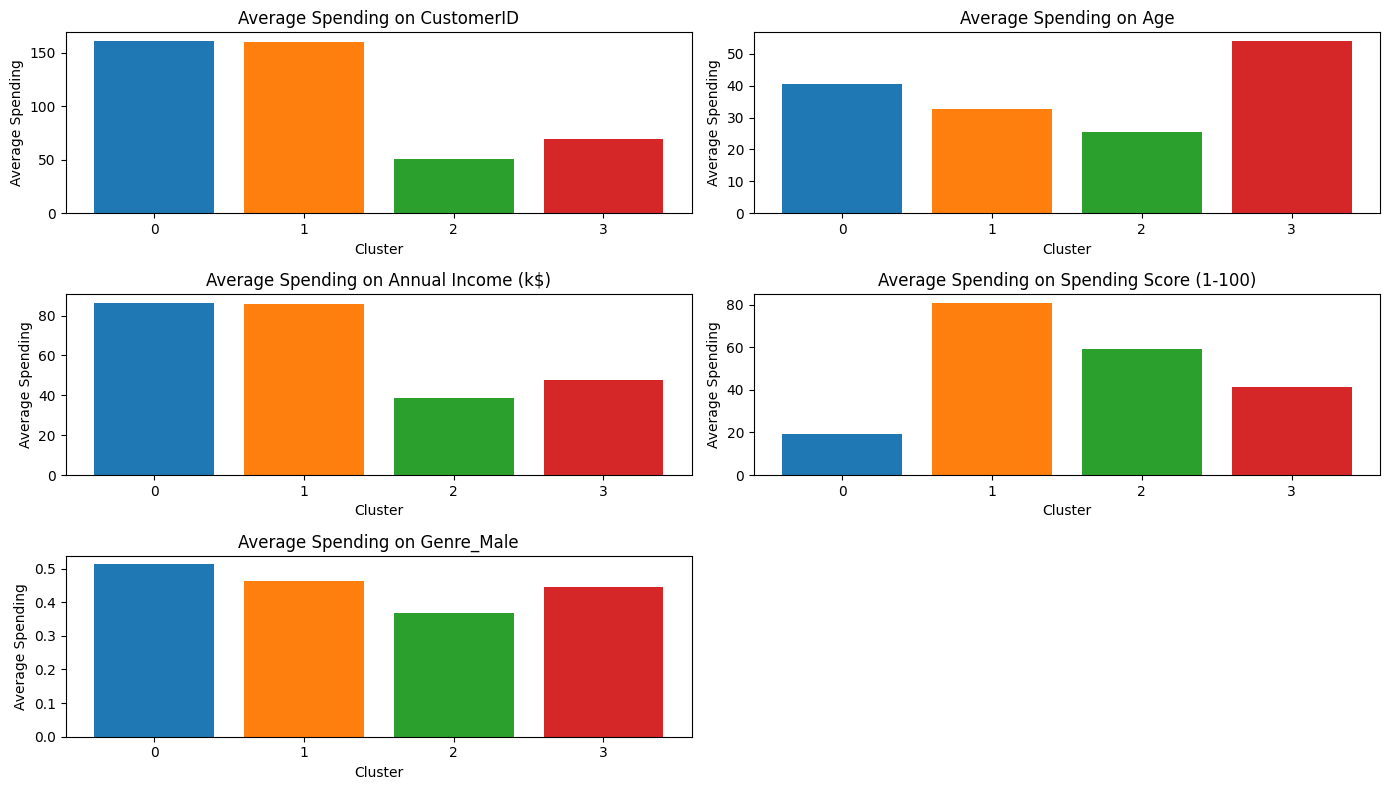

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("Mall_Customers.csv")

data = pd.get_dummies(data, columns=['Genre'], drop_first=True)

scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

optimalClusters = 4  
kmeans = KMeans(n_clusters=optimalClusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaledData)

cluster_summary = data.groupby('Cluster').mean()

plt.figure(figsize=(14, 8))

for i, column in enumerate(cluster_summary.columns):
    plt.subplot(3, 2, i + 1)  
    plt.bar(cluster_summary.index, cluster_summary[column], color=plt.cm.tab10.colors)
    plt.title(f'Average Spending on {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Average Spending')
    plt.xticks(cluster_summary.index)

plt.tight_layout()
plt.show()


Apply hierarchical clustering to the Wholesale Customers dataset and visualize the dendrogram. Compare the cluster assignments with those obtained from K-Means.


c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


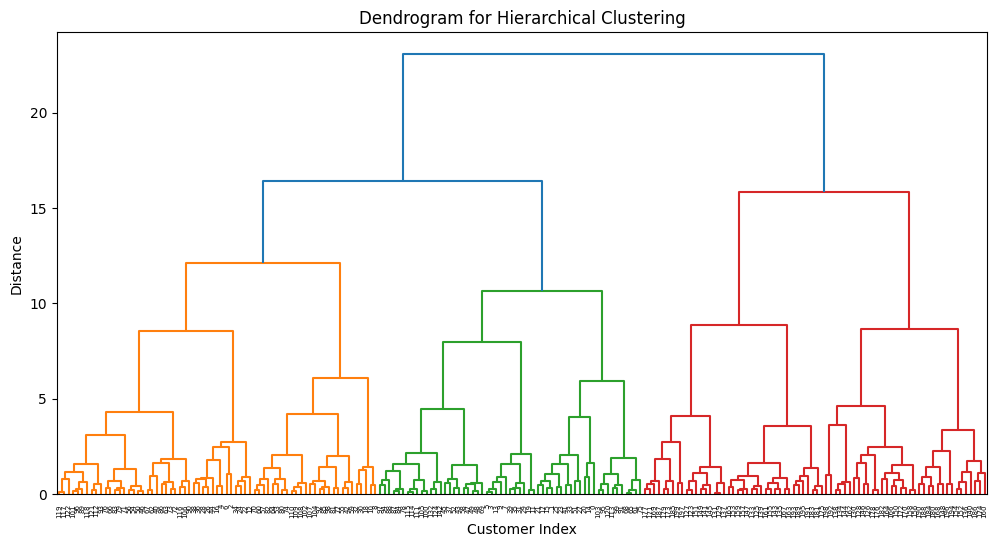

K-Means Cluster Counts:
 KMeans_Cluster
3    63
2    57
1    41
0    39
Name: count, dtype: int64

Hierarchical Cluster Counts:
 Hierarchical_Cluster
2    126
1     74
Name: count, dtype: int64


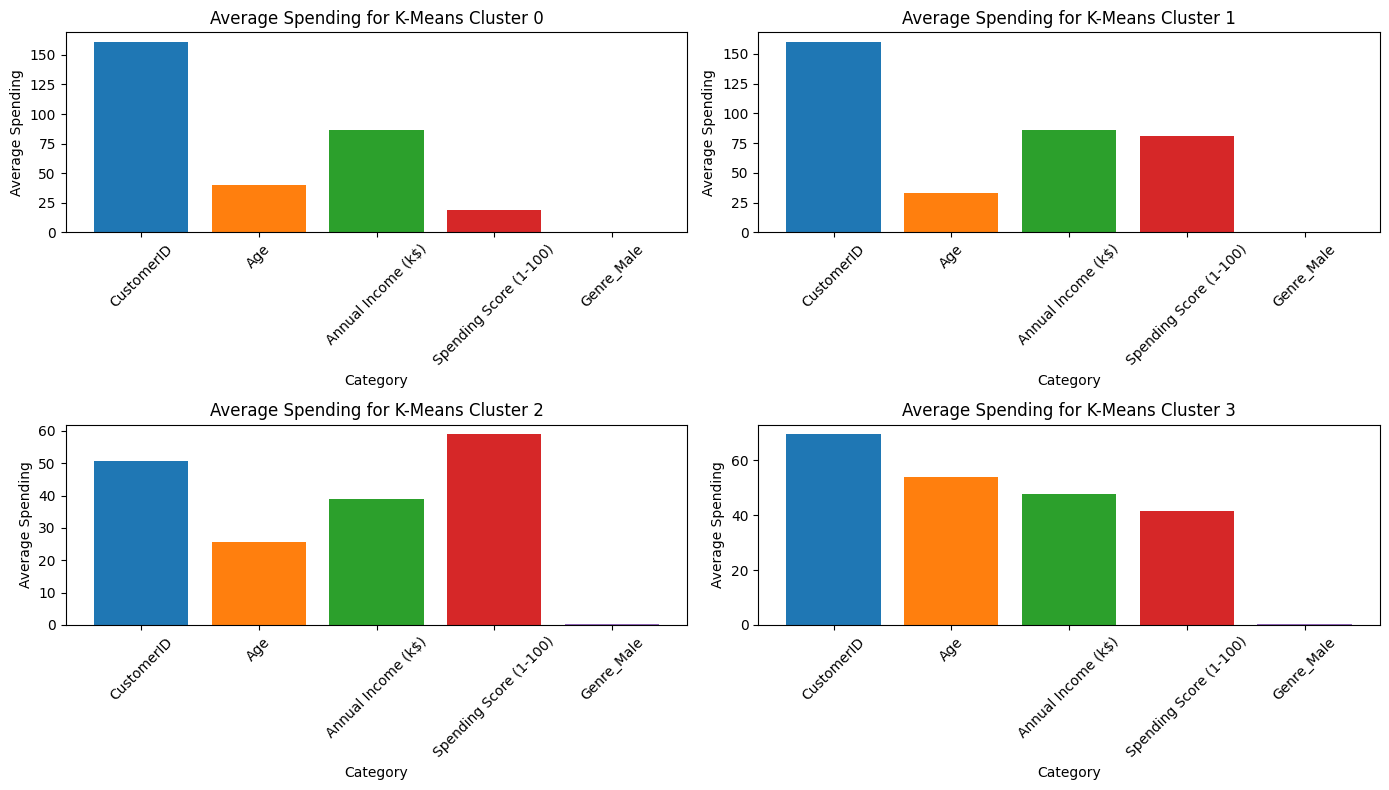

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

data = pd.read_csv("Mall_Customers.csv")

data = pd.get_dummies(data, columns=['Genre'], drop_first=True)

scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=optimalClusters, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(scaledData)

linked = linkage(scaledData, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, 
           orientation='top', 
           labels=data.index, 
           distance_sort='descending', 
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

from scipy.cluster.hierarchy import fcluster

threshold = 20  
data['Hierarchical_Cluster'] = fcluster(linked, t=threshold, criterion='distance')

kmeansCounts = data['KMeans_Cluster'].value_counts()
hierarchicalCounts = data['Hierarchical_Cluster'].value_counts()

print("K-Means Cluster Counts:\n", kmeansCounts)
print("\nHierarchical Cluster Counts:\n", hierarchicalCounts)

plt.figure(figsize=(14, 8))

for i in range(optimalClusters):
    plt.subplot(2, 2, i + 1)
    cluster_data = data[data['KMeans_Cluster'] == i].mean().drop(['KMeans_Cluster', 'Hierarchical_Cluster'])
    plt.bar(cluster_data.index, cluster_data.values, color=plt.cm.tab10.colors)
    plt.title(f'Average Spending for K-Means Cluster {i}')
    plt.xlabel('Category')
    plt.ylabel('Average Spending')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Apply hierarchical clustering to the Wholesale Customers dataset and visualize the dendrogram. Compare the cluster assignments with those obtained from K-Means.


c:\Users\Humna Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


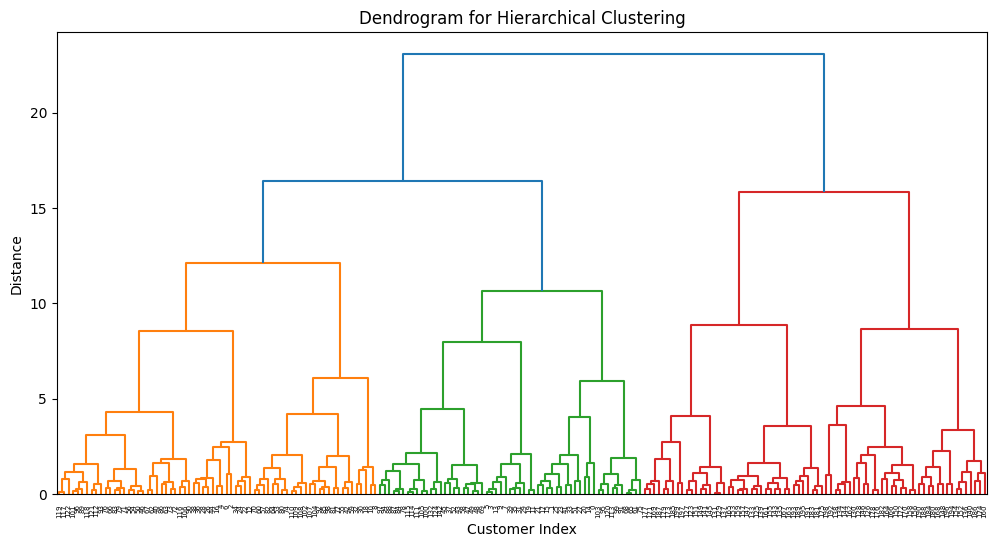

K-Means Cluster Counts:
 KMeans_Cluster
0    39
1    41
2    57
3    63
Name: count, dtype: int64

Hierarchical Cluster Counts:
 Hierarchical_Cluster
1     74
2    126
Name: count, dtype: int64


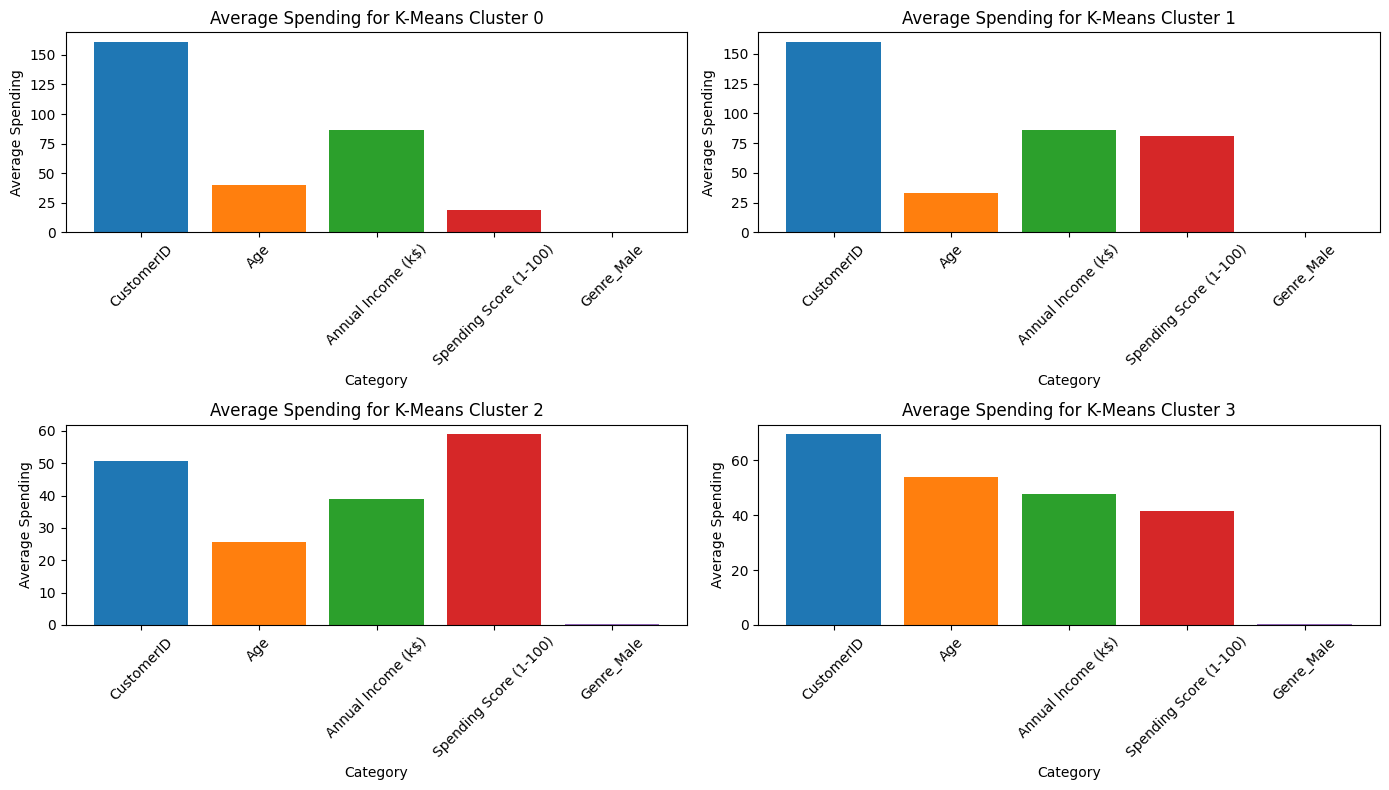

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

data = pd.read_csv("Mall_Customers.csv")

data = pd.get_dummies(data, columns=['Genre'], drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

optimalClusters = 4  
kmeans = KMeans(n_clusters=optimalClusters, random_state=42)
data['KMeansCluster'] = kmeans.fit_predict(scaled_data)

linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, 
           orientation='top', 
           labels=data.index, 
           distance_sort='descending', 
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

threshold = 3
data['HierarchicalCluster'] = fcluster(linked, t=threshold, criterion='distance')

kmeansCounts = data['KMeansCluster'].value_counts().sort_index()
hierarchicalCounts = data['HierarchicalCluster'].value_counts().sort_index()

print("K-Means Cluster Counts:\n", kmeansCounts)
print("\nHierarchical Cluster Counts:\n", hierarchicalCounts)

plt.figure(figsize=(14, 8))

for i in range(optimalClusters):
    plt.subplot(2, 2, i + 1)
    cluster_data = data[data['KMeansCluster'] == i].mean().drop(['KMeansCluster', 'HierarchicalCluster'])
    plt.bar(cluster_data.index, cluster_data.values, color=plt.cm.tab10.colors)
    plt.title(f'Average Spending for K-Means Cluster {i}')
    plt.xlabel('Category')
    plt.ylabel('Average Spending')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
